### Setup

In [ ]:
!pip install -U -q PyDrive
!pip install -q scanpy
!pip install -q paste-bio
!pip install -q POT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.9/702.9 kB 6.0 MB/s eta 0:00:00


Authenticating Google Drive to download files

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1Emm9eRKYAdc1kwpI4_RWqJAsXwY5BnLK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1_coords.csv')

id = '1uQ3OcOvgznBd0-YAyFM5IMm-9Atb0PMX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1.h5')

id = '1Tix0CRW20diWZ9Y3Q4TvUa86CvUY6Gui'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2_coords.csv')

id = '12FJ8ph0MN4sNWqQQe1G4vrZNi05mf6Fx'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2.h5')

id = '1MQt_AyKssgWpXV64vYtQLO5SlYDUilSu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3_coords.csv')

id = '1AQqbuLcfHc3hwsTrDVPyH_5Bdfsb9Z_b'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3.h5')

id = '1-zQsQbP0GXol0RuICGHp3tiaLQkfSFy-'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4_coords.csv')

id = '1iAEX8wrO49KldN1Zct928vHSEDeX2gzm'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4.h5')

id = '19J4fxCvPaotiFS6mMBPW48pYsDS937sL'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5_coords.csv')

id = '1VyzyoWBud-SIeleRKO99eFJMKs0koomI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5.h5')

id = '1aVUdgL9arv4eVBCGFkpA7kRJMFKWQzqn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6_coords.csv')

id = '1JBJkwZuB8ZAWJSyTaNinm6b5zCJoDeqg'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6.h5')

id = '1hEoMbe9Y04iotGCOFCJavC7Vg6qmTis0'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7_coords.csv')

id = '1j63oSsO5_crm2u75E_lKcXA_xq8ItwsE'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7.h5')

id = '1xZgN6rFVm80lLeKhN0zS0K3idUKBarVH'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8_coords.csv')

id = '1LKZcCaZylxkEDzJCoijrty4JqreUKzW5'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8.h5')

Imports

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import paste as pst
import seaborn as sns
import plotly.express as px

### Plot clusters

Read data

In [ ]:
slice_names = ["slice1", "slice2", "slice3", "slice4", "slice5", "slice6", "slice7", "slice8"]

def load_slices():
  slices = []
  for name in slice_names:
    adata_slice = sc.read_10x_h5(name + ".h5")
    coords_slice = np.genfromtxt(name + "_coords.csv", usecols=(2,3), delimiter=',', skip_header=1)
    adata_slice.obsm['spatial'] = coords_slice
    # preprocess data
    sc.pp.filter_genes(adata_slice, min_counts = 15)
    sc.pp.filter_cells(adata_slice, min_counts = 100)
    slices.append(adata_slice)
  return slices

Plot dendrogram

In [ ]:
def plot_dendro(adata, title):
    ann_mat = adata.X.toarray()
    linkage_mat = linkage(ann_mat, method='ward')
    plt.figure()
    plt.title(title)
    dendrogram(linkage_mat)
    plt.show()

Plot function

In [ ]:
def plot_clusters(adata, title, clusters):
    x = adata.obsm['spatial'][:, 0]
    y = adata.obsm['spatial'][:, 1]
    ann_mat = adata.X.toarray()
    linkage_mat = linkage(ann_mat, method='ward')
    labels = fcluster(linkage_mat, clusters, criterion='maxclust')
    plt.figure()
    palette = sns.color_palette("viridis", n_colors = clusters)
    sns.scatterplot(x=x, y=y, hue=labels, palette=palette).set(title=title, xticks=[], yticks=[])
    sns.despine(left=True, bottom=True)
    plt.legend()
    plt.show()

Access slices

In [ ]:
slices = load_slices()

Plot dendrograms

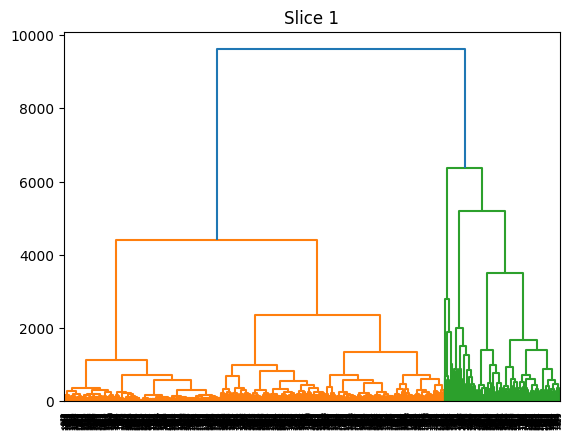

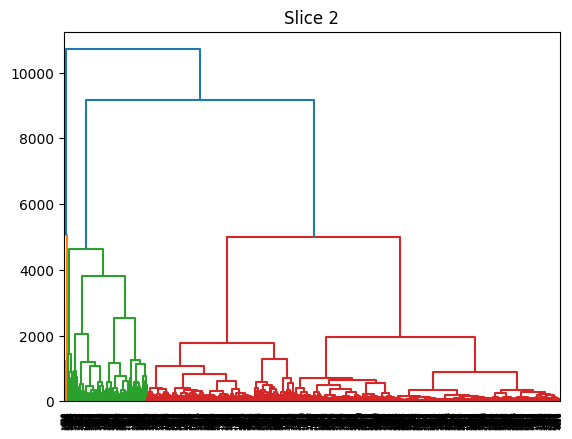

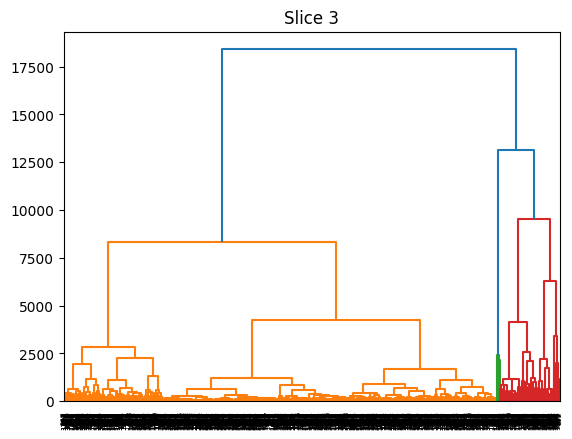

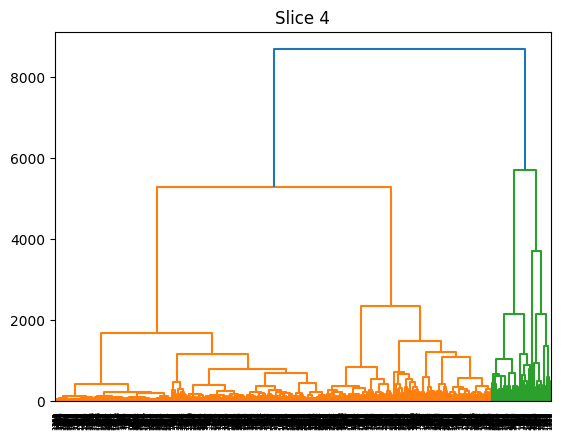

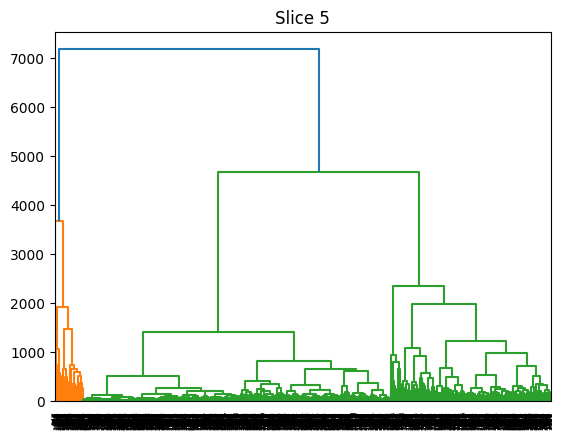

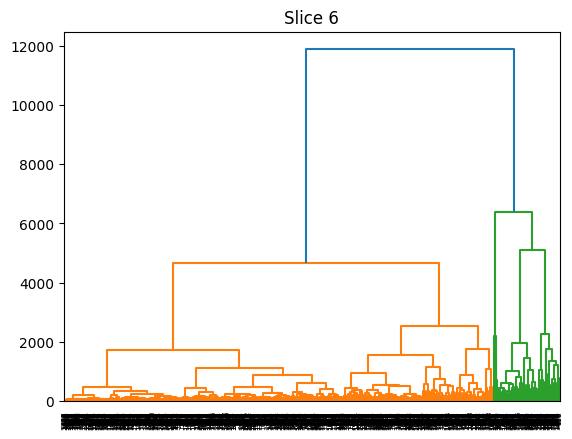

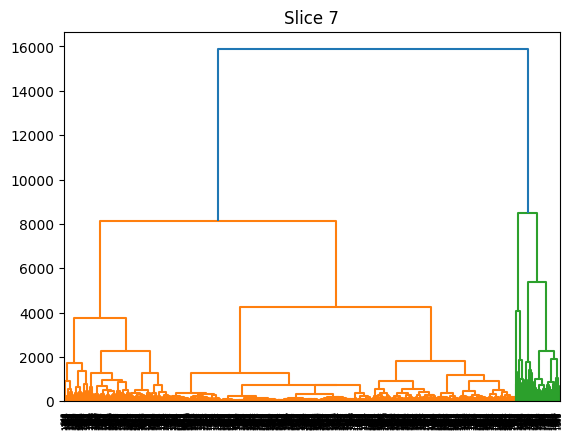

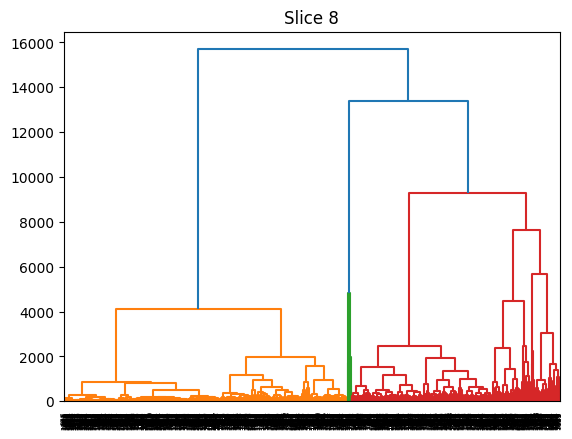

In [ ]:
for i in range(len(slices)):
  plot_dendro(slices[i], "Slice " + str(i + 1))

Plotting original clusters

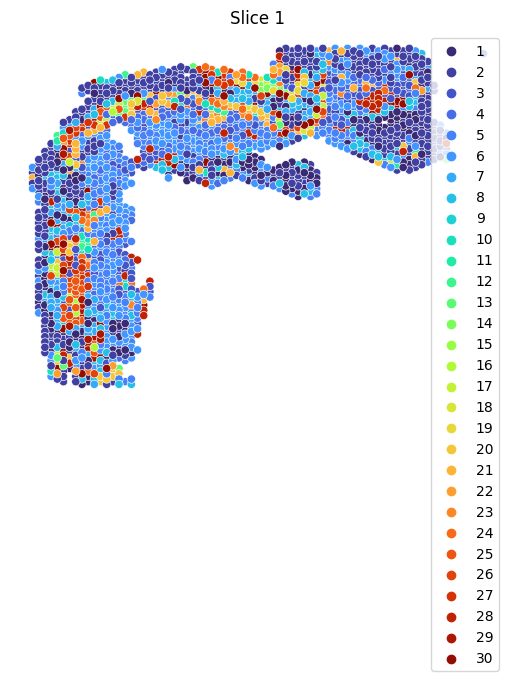

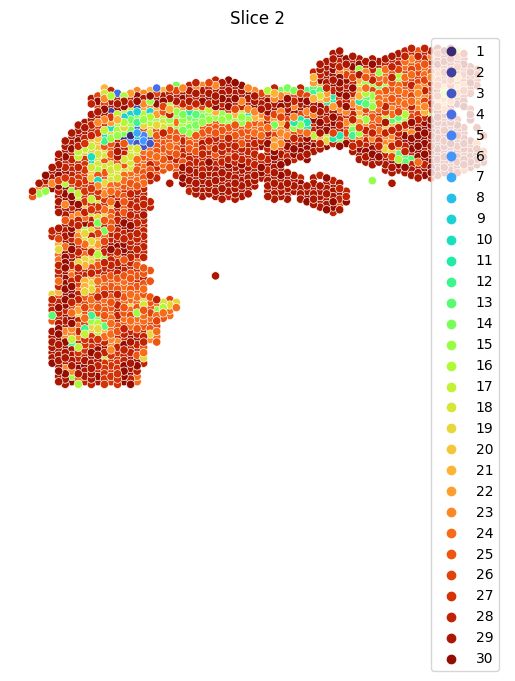

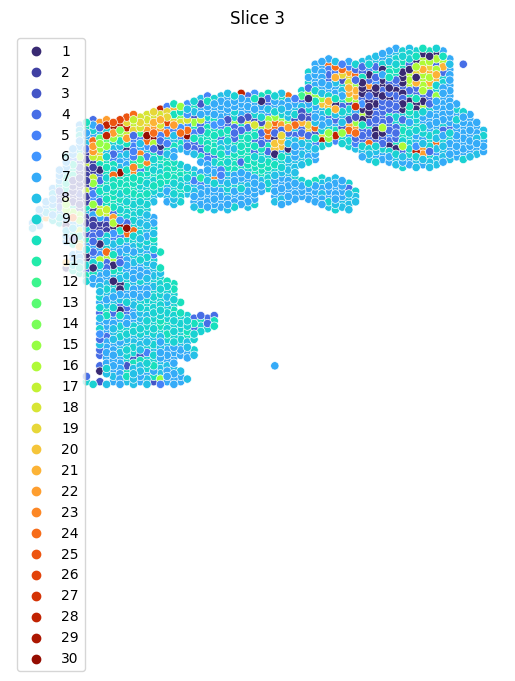

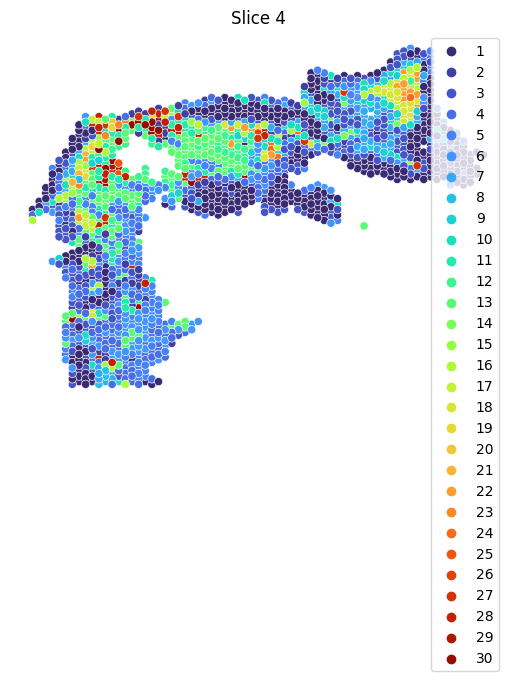

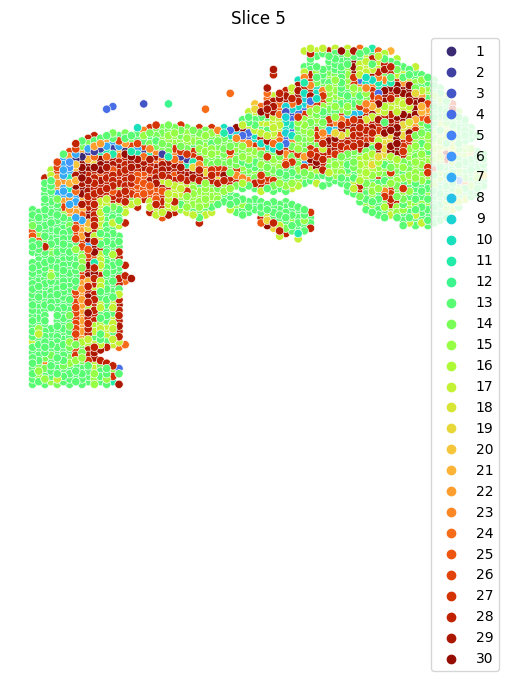

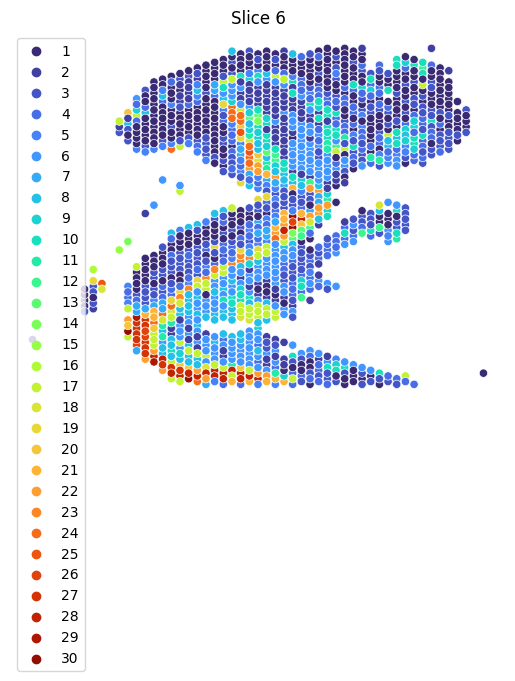

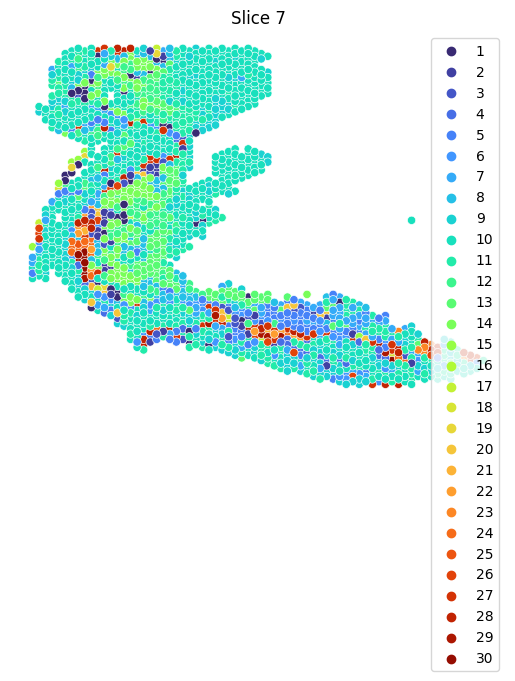

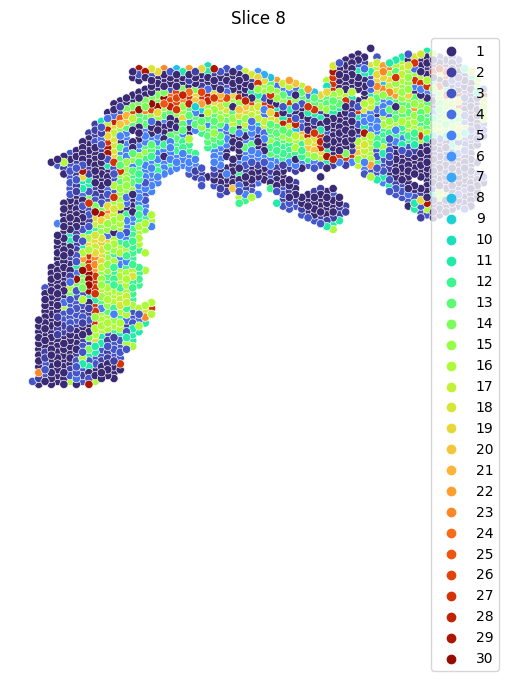

In [ ]:
for i in range(len(slices)):
  plot_clusters(slice[i], "Slice " + str(i + 1), 30)

In [ ]:
def plot_3d(slices):
  dfs = []

  for i, L in enumerate(slices):
    df = pd.DataFrame(L.obsm['spatial'], columns=['x', 'y'])

    df['z'] = i * 10
    df['label'] = "Slice " + str(i + 1)
    dfs.append(df)

  df = pd.concat(dfs)
  fig = px.scatter_3d(df, x='x', y='y', z='z', color='label', color_discrete_sequence = px.colors.sequential.Turbo, title="3D Reconstruction")
  fig.update_layout(legend_title_text='Annotations', scene={'zaxis': {'autorange':'reversed'}})
  fig.show()

In [ ]:
plot_3d(slices)